In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

As the numbers are within inverted commas, they become string values.So, need to convert to float.

In [8]:
df['TotalCharges']= df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [9]:
df.loc[df ['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [11]:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [12]:
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
 df.dropna(how = 'any', inplace = True)

Removed missing values

In [14]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [15]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

#Number of males and females are almost equal in the dataset

In [16]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

People who do not have partner are more likely to churn.

In [18]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [19]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [20]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [21]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64

In [22]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [23]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No internet service is similar to no. So, can br replaced with no.

In [24]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [25]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [26]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [27]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [28]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [29]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [30]:
df.replace({'OnlineBackup':{'No internet service' : 'No'}},inplace=True)

In [31]:
df.replace({'StreamingMovies':{'No internet service' : 'No'}},inplace=True)

In [32]:
df.replace({'DeviceProtection':{'No internet service' : 'No'}},inplace=True)

In [33]:
df.replace({'TechSupport':{'No internet service' : 'No'}},inplace=True)

In [34]:
df.replace({'OnlineSecurity':{'No internet service' : 'No'}},inplace=True)

In [35]:
df.replace({'StreamingTV':{'No internet service' : 'No'}},inplace=True)

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
cat = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in cat:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [39]:
#droping column customerID
df.drop(columns= ['customerID'], axis=1, inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
cols = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

for var in cols:
    le= LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


All the columns are now in integer and float format.

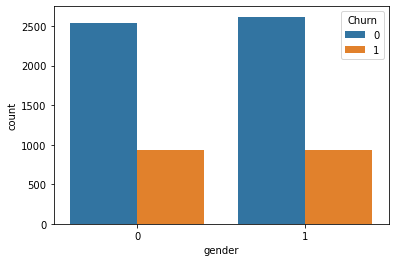

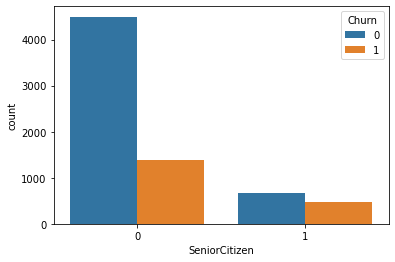

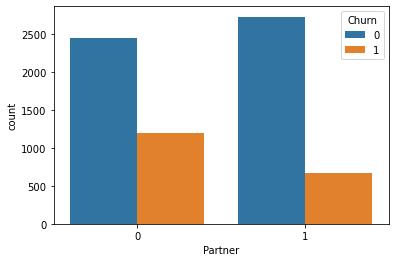

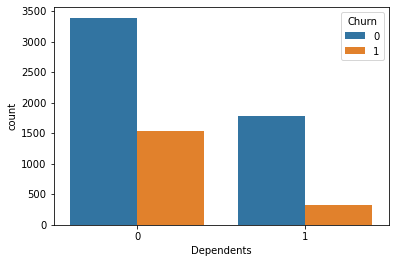

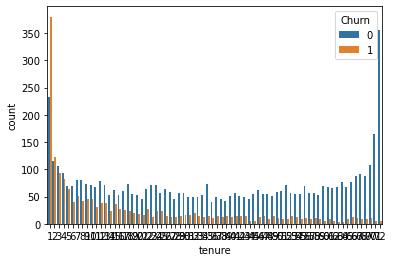

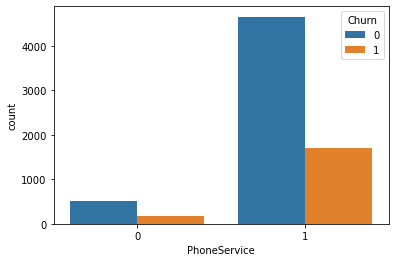

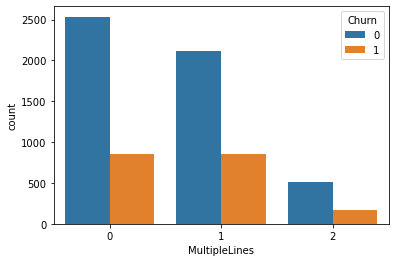

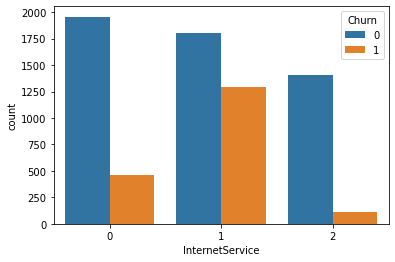

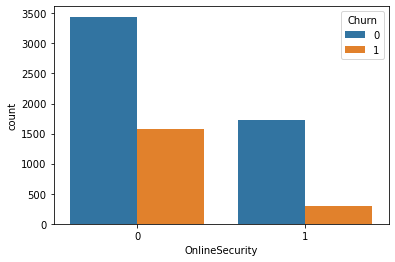

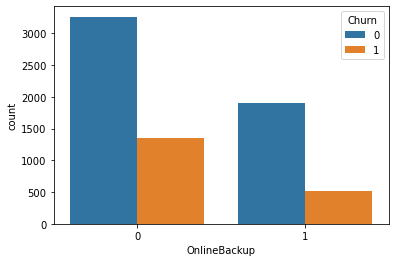

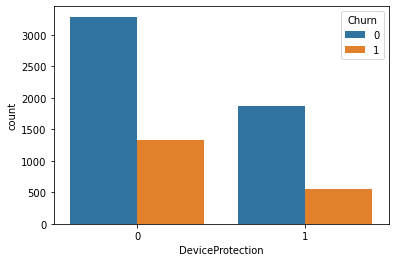

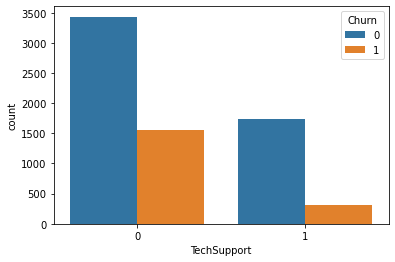

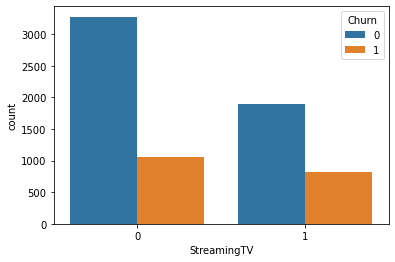

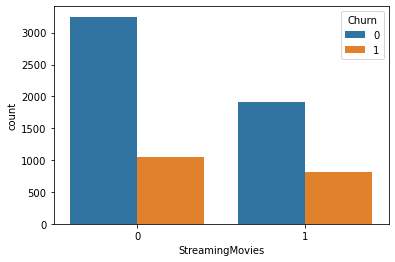

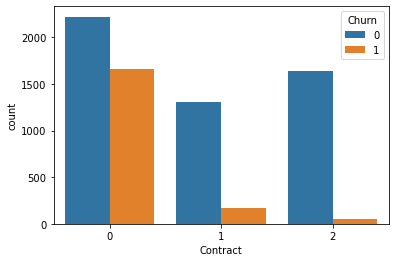

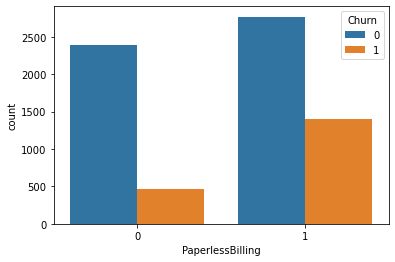

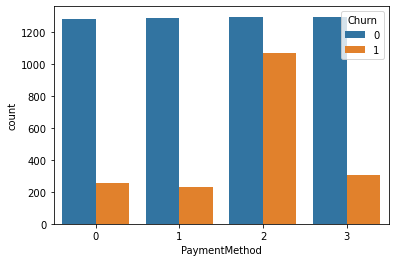

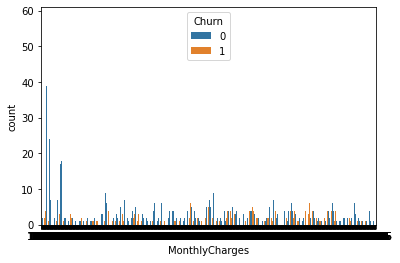

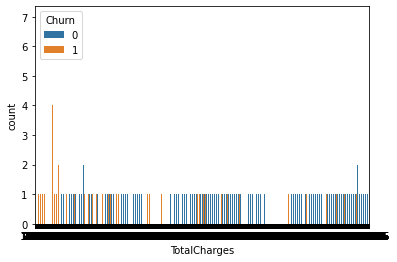

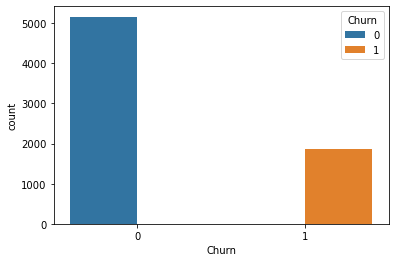

In [43]:
for i, predictor in enumerate(df):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

No Online security, No Tech Support , No Device Protection, No Online Backup, No Streaming TV, No Streaming Movies category are high churners
Non senior Citizens are high churners
Having Partners churn more
No Dependants churn less

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

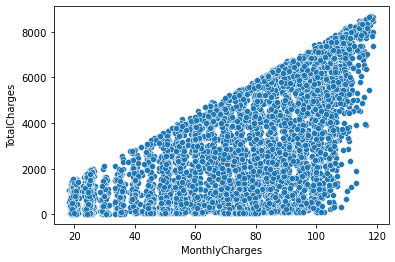

In [44]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')

Total Charges increase as Monthly Charges increase which is obvious.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

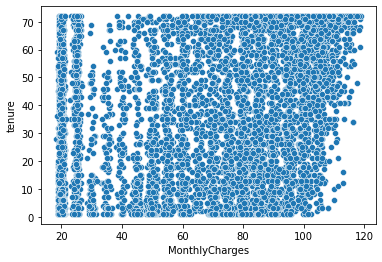

In [45]:
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure')

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

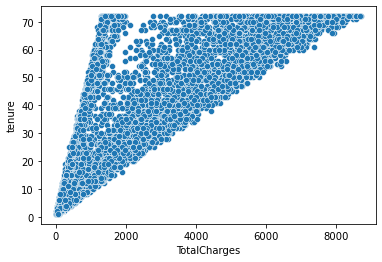

In [46]:
sns.scatterplot(data=df, x='TotalCharges', y='tenure')

Tenure of 0 to 10 have paid maximum amount of Total Charges.

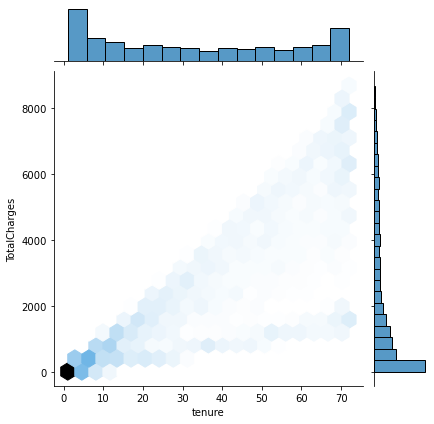

In [47]:
sns.jointplot(x='tenure', y='TotalCharges',data=df,kind='hex')

Tenure of 0 to 10 have paid maximum amount of Total Charges.

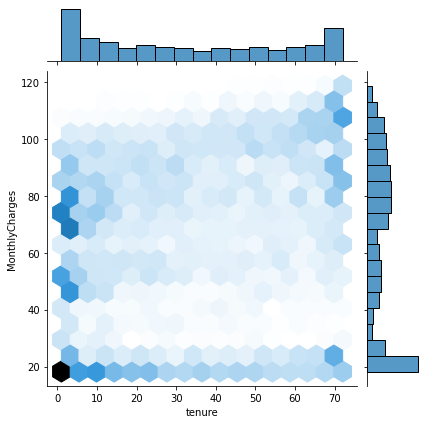

In [48]:
sns.jointplot(x='tenure', y='MonthlyCharges',data=df,kind='hex')

Total Charges increase as Monthly Charges increase which is obvious.

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

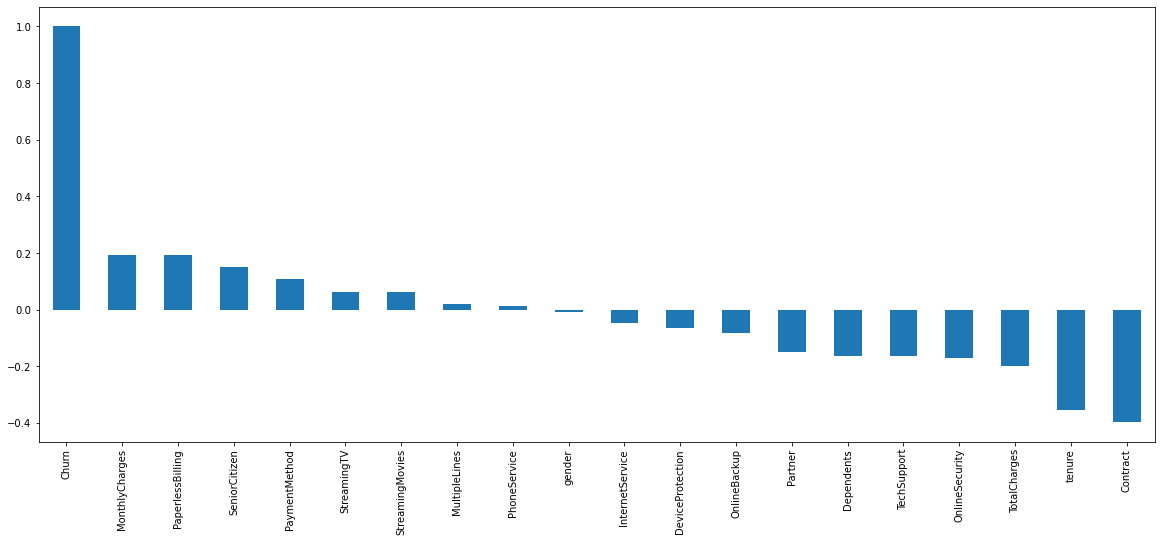

In [50]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

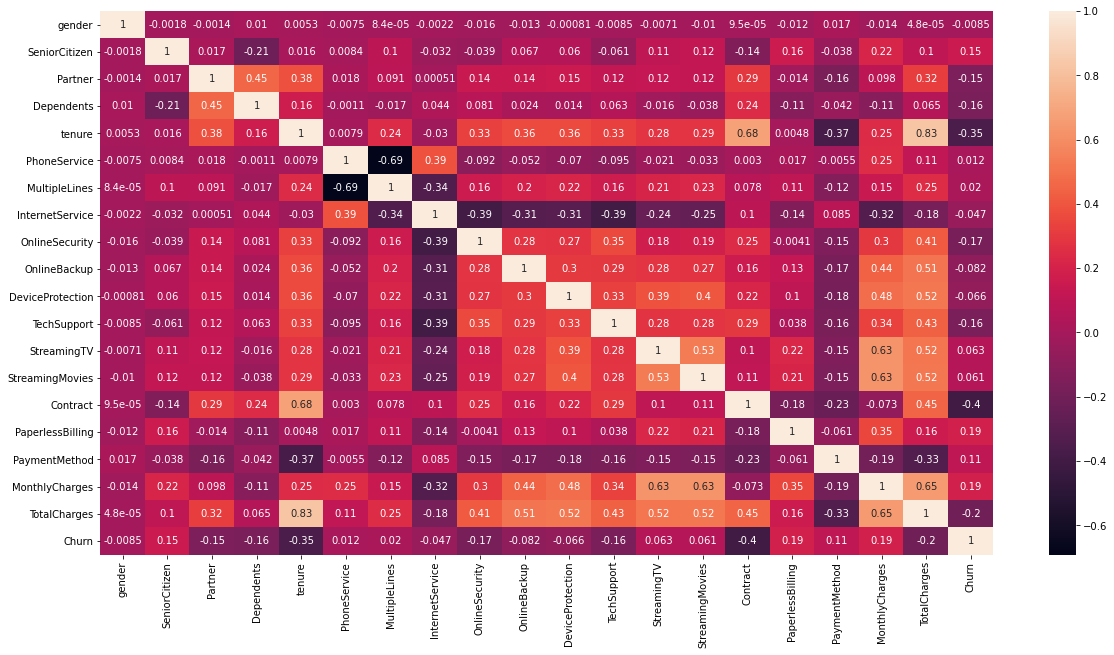

In [51]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [52]:
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.019609
PhoneService        0.011691
gender             -0.008545
InternetService    -0.047097
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

MonthlyCharges and PaperlessBilling have same correlation. Same with StreamingTV and StreamingMovies. Also with Dependents and TechSupport. So, can drop one of the colummns from the three combinations.

In [53]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.597820
InternetService     0.205704
OnlineSecurity      0.944373
OnlineBackup        0.652954
DeviceProtection    0.657594
TechSupport         0.925245
StreamingTV         0.475441
StreamingMovies     0.458191
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

Though TotalCharges is skewed, not applying any transformation technique as it is negatively correlated.

In [54]:
df.drop(columns= ['PaperlessBilling', 'StreamingMovies'], axis=1, inplace=True)

In [68]:
y = df['Churn']
x = df.drop(columns = ['Churn'])

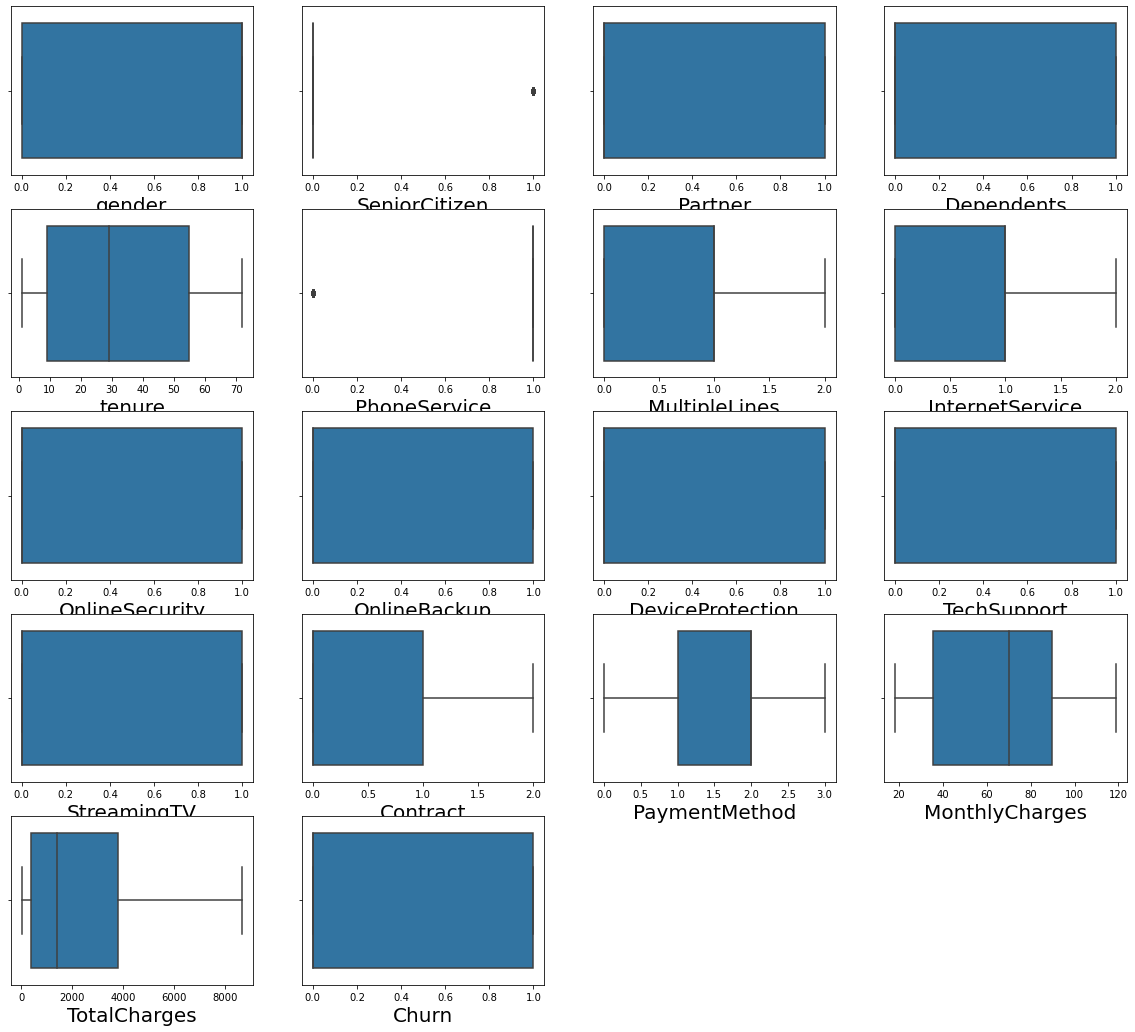

In [67]:
plt.figure(figsize = (20,18), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=20:
       ax = plt.subplot(5,4, plotnumber)
       sns.boxplot(df[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

No outliers in the dataset.

In [69]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [70]:
y.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [72]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.8253292021688613 on Random_state 85


The best random state found is 85. I will create my model using random state-85

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,random_state = maxRS)

In [74]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8253292021688613
[[1024  250]
 [ 201 1107]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1274
           1       0.82      0.85      0.83      1308

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582



In [75]:
from sklearn.tree import DecisionTreeClassifier

DT = LogisticRegression()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8253292021688613
[[1024  250]
 [ 201 1107]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1274
           1       0.82      0.85      0.83      1308

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582



In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8489542989930287
[[1077  197]
 [ 193 1115]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1274
           1       0.85      0.85      0.85      1308

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



In [77]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8489542989930287
[[1077  197]
 [ 193 1115]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1274
           1       0.85      0.85      0.85      1308

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



In [78]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.7965385850469613


In [79]:
rwr=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

Cross validation score of DecisionTree model : 0.7965385850469613


In [80]:
rwr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

Cross validation score of RandomForest model : 0.8306312979192695


In [81]:
rwr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of SVC model : 0.7965385850469613


The least difference in accuracy and cv score is for RandomForestClassifier. So, we found our best model

In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [85]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5, n_jobs=-1)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [87]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [88]:
model=RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 'log2',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

83.84972889233153


In [89]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))